## 优化器Optimizer

In [1]:
import os
##BASE_DIR = os.path.dirname(os.path.abspath(__file__))
import torch
import torch.optim as optim

**导数**

    函数在指定坐标轴上x的变化率
    
**方向导数**

    函数在指定方向上的变化率
    
**梯度**

    一个向量，向量方向为梯度最大值的方向

**优化器Optimizer的基本属性**

- defaults

    优化器超参数
    
- state
    
    参数缓存，如momentum的缓存
    
- param_group

    管理的参数组，依据不同的初始化进行分组  一个list结构，每一个元素为key-value的字典
    
- \_step\_count

    记录更新次数
    


In [41]:
##初始化参数及梯度

weight = torch.randn((2, 2), requires_grad=True)

In [42]:
'''
传递参数到优化器
'''
optimizer = optim.SGD([weight], lr=0.1)

In [43]:
'''
optim的参数
'''

optimizer.defaults # 字典格式

{'lr': 0.1,
 'momentum': 0,
 'dampening': 0,
 'weight_decay': 0,
 'nesterov': False}

In [44]:
'''
optim的参数组
'''
optimizer.param_groups

[{'params': [tensor([[ 2.2768,  2.2090],
           [-0.6272, -0.7168]], requires_grad=True)],
  'lr': 0.1,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False}]

In [45]:
optimizer.param_groups[0]['params']

[tensor([[ 2.2768,  2.2090],
         [-0.6272, -0.7168]], requires_grad=True)]

In [46]:
optimizer.state

defaultdict(dict, {})

**优化器Optimizer的基本方法**

- zero_grad()

    清空所管理的参数梯度 由于新的梯度值与原有的梯度值是累加的
    
- step()

    进行参数的一步更新
   
- add_param_group()

    添加参数组
    
- state_dict()

   获取优化器当前状态信息字典
   
- load_state_dict()

    加载状态信息字典

In [47]:
weight = torch.randn((2, 2), requires_grad=True)
weight.grad = torch.ones((2, 2))
optimizer = optim.SGD([weight], lr=0.1)

In [48]:
'''
梯度更新函数  step()
'''

print("weight before step:{}".format(weight.data))
optimizer.step()        # 修改lr=1 0.1观察结果
print("weight after step:{}".format(weight.data))

weight before step:tensor([[-0.2464,  0.1202],
        [-0.0018,  0.6168]])
weight after step:tensor([[-0.3464,  0.0202],
        [-0.1018,  0.5168]])


In [49]:
'''
梯度清零函数 zero_grad()
'''

print("weight.grad is {}\n".format(weight.grad))
optimizer.zero_grad()
print("after optimizer.zero_grad(), weight.grad is\n{}".format(weight.grad))

weight.grad is tensor([[1., 1.],
        [1., 1.]])

after optimizer.zero_grad(), weight.grad is
tensor([[0., 0.],
        [0., 0.]])


In [50]:
print("optimizer.param_groups is\n{}".format(optimizer.param_groups))

optimizer.param_groups is
[{'params': [tensor([[-0.3464,  0.0202],
        [-0.1018,  0.5168]], requires_grad=True)], 'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


In [51]:
'''
使用 add_param_group 为优化器添加参数
'''
# ----------------------------------- add_param_group -----------------------------------

w2 = torch.randn((3, 3), requires_grad=True)

optimizer.add_param_group({"params": w2, 'lr': 0.0001})  ##添加另一组参数 并为他设置学习率

print("optimizer.param_groups is\n{}".format(optimizer.param_groups))

optimizer.param_groups is
[{'params': [tensor([[-0.3464,  0.0202],
        [-0.1018,  0.5168]], requires_grad=True)], 'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}, {'params': [tensor([[ 0.6067, -1.6898, -1.8859],
        [-0.4855, -1.1372,  0.7215],
        [ 0.9482,  0.7658, -0.9246]], requires_grad=True)], 'lr': 0.0001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


In [53]:
'''
使用 state_dict 保留学习状态
'''
# ----------------------------------- state_dict -----------------------------------

optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
opt_state_dict = optimizer.state_dict()

print("state_dict before step:\n", opt_state_dict)

for i in range(10):
    optimizer.step()

print("state_dict after step:\n", optimizer.state_dict())
print("state_dict before step:\n", opt_state_dict)
##保存状态信息
torch.save(optimizer.state_dict(), os.path.join("D:/Jupyter/工作准备/pytorch学习/Pytorch基本手册", "optimizer_state_dict.pkl"))

state_dict before step:
 {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [1366746681992]}]}
state_dict after step:
 {'state': {1366746681992: {'momentum_buffer': tensor([[0., 0.],
        [0., 0.]])}}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [1366746681992]}]}
state_dict before step:
 {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [1366746681992]}]}


In [54]:
'''
使用 load state_dict 加载学习状态
'''
# -----------------------------------load state_dict -----------------------------------

optimizer = optim.SGD([weight], lr=0.1, momentum=0.9)
state_dict = torch.load(os.path.join("D:/Jupyter/工作准备/pytorch学习/Pytorch基本手册", "optimizer_state_dict.pkl"))

print("state_dict before load state:\n", optimizer.state_dict())
optimizer.load_state_dict(state_dict)  ##加载状态字典
print("state_dict after load state:\n", optimizer.state_dict())

state_dict before load state:
 {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [1366746681992]}]}
state_dict after load state:
 {'state': {1366746681992: {'momentum_buffer': tensor([[0., 0.],
        [0., 0.]])}}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [1366746681992]}]}


**pytorch优化器的使用步骤**

1. 参数初始化，需要自定义初始化函数
        net.initialize_weights()
    
2. 传递参数到优化器中 设计优化器
        optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)  
        
3. 清零优化器存储梯度 
        optimizer.zero_grad()
        
4. 优化更新梯度

        optimizer.step()

In [32]:
# 定义优化函数
def function_(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [36]:
# 查找函数最小值
x = torch.tensor([-4., 0.], requires_grad=True)
optimizer = optim.SGD([x], lr=0.01)
for epoch in range(10000):
    y = function_(x)

    # 清空梯度
    optimizer.zero_grad()

    y.backward()  # 计算梯度

    # 更新参数
    optimizer.step()

    # 输出结果
    if epoch % 2000 == 0:
        print('step {}: x = {}, f(x) = {}'.format(epoch, x.tolist(), y.item()))  #tolist将x转为list

step 0: x = [-2.9800000190734863, -0.09999999403953552], f(x) = 146.0
step 2000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 4000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 6000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 8000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0


## 学习率的设定

In [12]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

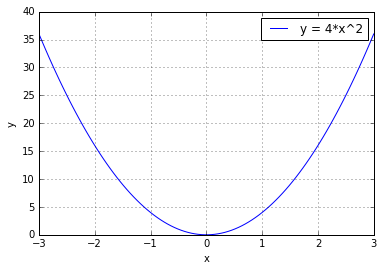

In [13]:
def func(x_t):
    """
    y = (2x)^2 = 4*x^2      dy/dx = 8x
    """
    return torch.pow(2*x_t, 2)


# init
x = torch.tensor([2.], requires_grad=True)


# ------------------------------ plot data ------------------------------


x_t = torch.linspace(-3, 3, 100)
y = func(x_t)
plt.plot(x_t.numpy(), y.numpy(), label="y = 4*x^2")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Iter:0, X:     2.0, X.grad:    16.0, loss:      16.0
Iter:1, X:1.840000033378601, X.grad:14.720000267028809, loss:13.542400360107422
Iter:2, X:1.6928000450134277, X.grad:13.542400360107422, loss:11.462287902832031
Iter:3, X:1.5573760271072388, X.grad:12.45900821685791, loss:9.701680183410645
Iter:4, X:1.432785987854004, X.grad:11.462287902832031, loss:8.211503028869629
Iter:5, X:1.3181631565093994, X.grad:10.545305252075195, loss:6.950216293334961
Iter:6, X:1.2127101421356201, X.grad:9.701681137084961, loss:5.882663726806641
Iter:7, X:1.1156933307647705, X.grad:8.925546646118164, loss:4.979086399078369
Iter:8, X:1.0264378786087036, X.grad:8.211503028869629, loss:4.214298725128174
Iter:9, X:0.9443228244781494, X.grad:7.554582595825195, loss:3.5669822692871094
Iter:10, X:0.8687769770622253, X.grad:6.950215816497803, loss:3.0190937519073486
Iter:11, X:0.7992748022079468, X.grad:6.394198417663574, loss:2.555360794067383
Iter:12, X:0.7353328466415405, X.grad:5.882662773132324, loss:2.162857

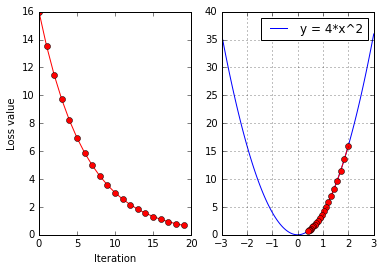

In [14]:
# ------------------------------ gradient descent ------------------------------

iter_rec, loss_rec, x_rec = list(), list(), list()

lr = 0.01    # /1. /.5 /.2 /.1 /.125
max_iteration = 20   # /1. 4     /.5 4   /.2 20 200

for i in range(max_iteration):

    y = func(x)
    y.backward()

    print("Iter:{}, X:{:8}, X.grad:{:8}, loss:{:10}".format(
        i, x.detach().numpy()[0], x.grad.detach().numpy()[0], y.item()))

    x_rec.append(x.item())

    x.data.sub_(lr * x.grad)    # x -= x.grad  数学表达式意义:  x = x - x.grad    # 0.5 0.2 0.1 0.125
    x.grad.zero_()

    iter_rec.append(i)
    loss_rec.append(y)

plt.subplot(121).plot(iter_rec, loss_rec, '-ro')
plt.xlabel("Iteration")
plt.ylabel("Loss value")

x_t = torch.linspace(-3, 3, 100)
y = func(x_t)
plt.subplot(122).plot(x_t.numpy(), y.numpy(), label="y = 4*x^2")
plt.grid()
y_rec = [func(torch.tensor(i)).item() for i in x_rec]
plt.subplot(122).plot(x_rec, y_rec, '-ro')
plt.legend()
plt.show()

Iter:0, X:     0.0, X.grad:     0.0, loss:       0.0
Iter:1, X:     0.0, X.grad:     0.0, loss:       0.0
Iter:2, X:     0.0, X.grad:     0.0, loss:       0.0
Iter:3, X:     0.0, X.grad:     0.0, loss:       0.0


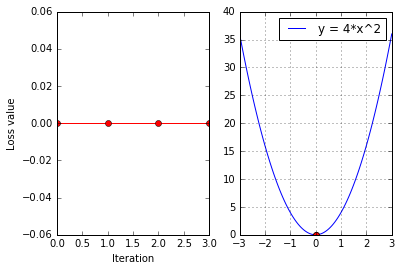

In [16]:
iter_rec, loss_rec, x_rec = list(), list(), list()

lr = 0.125    # /1. /.5 /.2 /.1 /.125
max_iteration = 4  # /1. 4     /.5 4   /.2 20 200

for i in range(max_iteration):

    y = func(x)
    y.backward()

    print("Iter:{}, X:{:8}, X.grad:{:8}, loss:{:10}".format(
        i, x.detach().numpy()[0], x.grad.detach().numpy()[0], y.item()))

    x_rec.append(x.item())

    x.data.sub_(lr * x.grad)    # x -= x.grad  数学表达式意义:  x = x - x.grad    # 0.5 0.2 0.1 0.125
    x.grad.zero_()

    iter_rec.append(i)
    loss_rec.append(y)

plt.subplot(121).plot(iter_rec, loss_rec, '-ro')
plt.xlabel("Iteration")
plt.ylabel("Loss value")

x_t = torch.linspace(-3, 3, 100)
y = func(x_t)
plt.subplot(122).plot(x_t.numpy(), y.numpy(), label="y = 4*x^2")
plt.grid()
y_rec = [func(torch.tensor(i)).item() for i in x_rec]
plt.subplot(122).plot(x_rec, y_rec, '-ro')
plt.legend()
plt.show()

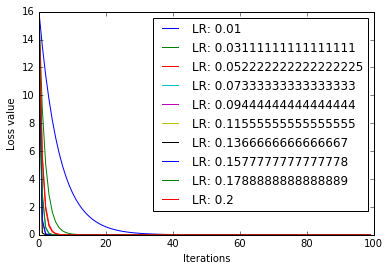

In [17]:
# ------------------------------ multi learning rate ------------------------------


iteration = 100
num_lr = 10
lr_min, lr_max = 0.01, 0.2  # .5 .3 .2

lr_list = np.linspace(lr_min, lr_max, num=num_lr).tolist()
loss_rec = [[] for l in range(len(lr_list))]
iter_rec = list()

for i, lr in enumerate(lr_list):  # 构建多个学习率 进行查找最优学习率
    x = torch.tensor([2.], requires_grad=True)
    for iter in range(iteration):

        y = func(x)
        y.backward()
        x.data.sub_(lr * x.grad)  # x.data -= x.grad
        x.grad.zero_()

        loss_rec[i].append(y.item())

for i, loss_r in enumerate(loss_rec):
    plt.plot(range(len(loss_r)), loss_r, label="LR: {}".format(lr_list[i]))
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

### 指数加权平均的理解

![](./expweight.jpg)

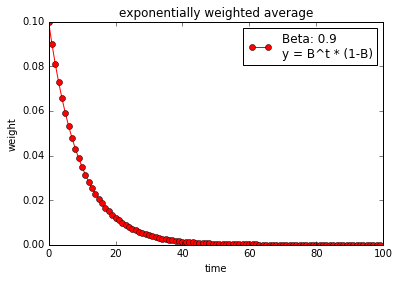

0.9999734386011124


In [18]:
'''
指数加权 时间越长，权重越小
'''

def exp_w_func(beta, time_list):
    return [(1 - beta) * np.power(beta, exp) for exp in time_list]


beta = 0.9
num_point = 100
time_list = np.arange(num_point).tolist()

# ------------------------------ exponential weight ------------------------------

weights = exp_w_func(beta, time_list)

plt.plot(time_list, weights, '-ro', label="Beta: {}\ny = B^t * (1-B)".format(beta))
plt.xlabel("time")
plt.ylabel("weight")
plt.legend()
plt.title("exponentially weighted average")
plt.show()

print(np.sum(weights))

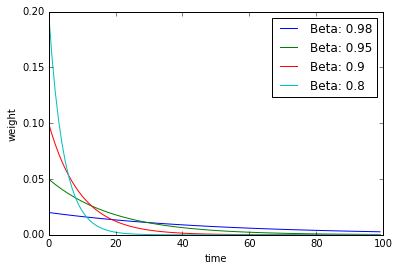

In [19]:
# ------------------------------ multi weights ------------------------------

'''
不同指数权重的影响 越大记忆周期越长，否则记忆周期越短
'''


beta_list = [0.98, 0.95, 0.9, 0.8]
w_list = [exp_w_func(beta, time_list) for beta in beta_list]
for i, w in enumerate(w_list):
    plt.plot(time_list, w, label="Beta: {}".format(beta_list[i]))
plt.xlabel("time")
plt.ylabel("weight")
plt.legend()
plt.show()

### Momentum的理解

- 对梯度进行历史累加

![](./memento.jpg)

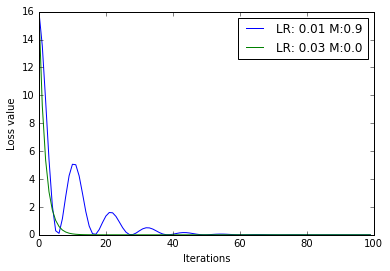

In [21]:
# ------------------------------ SGD momentum ------------------------------


def func(x):
    return torch.pow(2 * x, 2)  # y = (2x)^2 = 4*x^2        dy/dx = 8x


iteration = 100
m = 0.9  # .9 .63

lr_list = [0.01, 0.03]

momentum_list = list()
loss_rec = [[] for l in range(len(lr_list))]
iter_rec = list()

for i, lr in enumerate(lr_list):
    x = torch.tensor([2.], requires_grad=True)

    momentum = 0. if lr == 0.03 else m
    momentum_list.append(momentum)

    optimizer = optim.SGD([x], lr=lr, momentum=momentum)

    for iter in range(iteration):

        y = func(x)
        y.backward()

        optimizer.step()
        optimizer.zero_grad()

        loss_rec[i].append(y.item())

for i, loss_r in enumerate(loss_rec):
    plt.plot(range(len(loss_r)),
             loss_r,
             label="LR: {} M:{}".format(lr_list[i], momentum_list[i]))
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## pytorch优化器选择

     torch.optim.SGD(params, lr=, momentum=0, dampening=0, weight_decay=0, nesterov=False)

- params(iterable)

    参数组，优化器要管理的那部分参数。
   
       #对不同的层初始化学习率
        optim.SGD([
            {'params': model.base.parameters()},
            {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)

- lr(float) 

    初始学习率，可按需随着训练过程不断调整学习率。

- momentum(float)

    动量，通常设置为0.9，0.8

- dampening(float)

     dampening for momentum ，暂时不了其功能，在源码中是这样用的：buf.mul_(momentum).add_(1 - dampening, d_p)，值得注意的是，若采用nesterov，dampening必须为 0.

- weight_decay(float)

    权值衰减系数，也就是L2正则项的系数

- nesterov(bool)

    bool选项，是否使用NAG(Nesterov accelerated gradient)

    torch.optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

- params (iterable) 

    用于优化的可以迭代参数或定义参数组
- rho (float, 可选) 

    用于计算平方梯度的运行平均值的系数（默认值：0.9）
    
- eps (float, 可选) 
    
    增加到分母中以提高数值稳定性的术语（默认值：1e-6）
    
- lr (float, 可选) 

    将delta应用于参数之前缩放的系数（默认值：1.0）
    
- weight_decay (float, 可选)

    权重衰减 (L2范数)（默认值: 0）

    torch.optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0)

- params (iterable)

    用于优化的可以迭代参数或定义参数组
    
- lr (float, 可选) 

    学习率（默认: 1e-2）
 
- lr_decay (float, 可选) 

    学习率衰减（默认: 0）
    
- weight_decay (float, 可选) 

    权重衰减（L2范数）（默认: 0）

    torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

- params (iterable) 

    用于优化的可以迭代参数或定义参数组
    
- lr (float, 可选) 

    学习率（默认：1e-3）
    
- betas (Tuple[float, float], 可选) 

    用于计算梯度运行平均值及其平方的系数（默认：0.9，0.999）
    
- eps (float, 可选) 

    增加分母的数值以提高数值稳定性（默认：1e-8）
    
- weight_decay (float, 可选) 

    权重衰减（L2范数）（默认: 0）

    torch.optim.Adamax(params, lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

- params (iterable) 

    用于优化的可以迭代参数或定义参数组

- lr (float, 可选) 

    学习率（默认：2e-3）

- betas (Tuple[float, float], 可选) 

    用于计算梯度以及梯度平方的运行平均值的系数

- eps (float, 可选) 

    增加分母的数值以提高数值稳定性（默认：1e-8）

- weight_decay (float, 可选) 

    权重衰减（L2范数）（默认: 0）

    torch.optim.ASGD(params, lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0)
    
- params (iterable) 

    用于优化的可以迭代参数或定义参数组

- lr (float, 可选) 

    学习率（默认：1e-2）

- lambd (float, 可选) 

    衰减期（默认：1e-4）
    
- alpha (float, 可选) 

    eta更新的指数（默认：0.75）
    
- t0 (float, 可选) 

    指明在哪一次开始平均化（默认：1e6）
    
- weight_decay (float, 可选) 

    权重衰减（L2范数）（默认: 0）

    torch.optim.LBFGS(params, lr=1, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
    
- lr (float) 

    学习率（默认：1）

- max_iter (int) 

    每个优化步骤的最大迭代次数（默认：20）)

- max_eval (int) 

    每个优化步骤的最大函数评估次数（默认：max * 1.25）

- tolerance_grad (float) 

    一阶最优的终止容忍度（默认：1e-5）

- tolerance_change (float) 

    功能值/参数更改的终止公差（默认：1e-9）

- history_size (int) 

    更新历史记录大小（默认：100）

    torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)[source]

- params (iterable) 

    用于优化的可以迭代参数或定义参数组

- lr (float, 可选) 

    学习率（默认：1e-2）

- momentum (float, 可选) 

    动量因子（默认：0）

- alpha (float, 可选) 

    平滑常数（默认：0.99）

- eps (float, 可选) 

    增加分母的数值以提高数值稳定性（默认：1e-8）

- centered (bool, 可选) 

    如果为True，计算中心化的RMSProp，通过其方差的估计来对梯度进行归一化

- weight_decay (float, 可选) 

    权重衰减（L2范数）（默认: 0）

     torch.optim.Rprop(params, lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))
     
- params (iterable) 

    用于优化的可以迭代参数或定义参数组

- lr (float, 可选) 

    学习率（默认：1e-2）
    
- etas (Tuple[float, float], 可选) 

    一对（etaminus，etaplis）, 它们是乘数增加和减少因子（默认：0.5，1.2）

- step_sizes (Tuple[float, float], 可选) 

    允许的一对最小和最大的步长（默认：1e-6，50）